In [21]:
import pandas as pd

df = pd.read_csv("../../data/preprocessed_AQI_data.csv")
df.head()

,Country,AQI Category,CO AQI Value,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,PM2.5 AQI Value,PM2.5 AQI Category
0,134,2,1,36,0,0,51,2
1,23,0,1,5,0,1,41,0
2,77,2,1,39,0,2,66,2
3,126,0,1,34,0,0,20,0
4,176,2,1,14,0,11,54,2


In [22]:
from sklearn.model_selection import train_test_split

# shuffle the data before splitting
df_shuffled = df.sample(frac=1, random_state=19)
X = df_shuffled.drop(["AQI Category"], axis=1)
y = df_shuffled["AQI Category"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=22
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2845, 7) (11384, 7)
(2845,) (11384,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier(random_state=20)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [24]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.9989458889669712


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5301
           1       1.00      0.88      0.94        41
           2       1.00      1.00      1.00      4741
           3       0.99      1.00      0.99       618
           4       1.00      0.99      1.00       588
           5       0.95      0.98      0.96        95

    accuracy                           1.00     11384
   macro avg       0.99      0.97      0.98     11384
weighted avg       1.00      1.00      1.00     11384



In [26]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = dt_classifier.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5301    0    0    0    0    0]
 [   0   36    0    0    0    5]
 [   0    0 4741    0    0    0]
 [   0    0    0  618    0    0]
 [   0    0    0    5  583    0]
 [   0    0    0    2    0   93]]


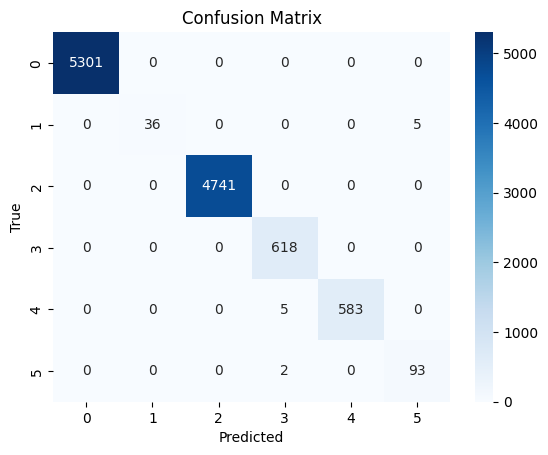

In [27]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5301
           1       1.00      0.88      0.94        41
           2       1.00      1.00      1.00      4741
           3       0.99      1.00      0.99       618
           4       1.00      0.99      1.00       588
           5       0.95      0.98      0.96        95

    accuracy                           1.00     11384
   macro avg       0.99      0.97      0.98     11384
weighted avg       1.00      1.00      1.00     11384



In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
)

# here we define different scorers metrics
scorer_f1 = make_scorer(f1_score, average="weighted")
scorer_precision = make_scorer(precision_score, average="weighted", zero_division=1)
scorer_recall = make_scorer(recall_score, average="weighted")
scorer_accuracy = make_scorer(accuracy_score)

# we save them in a dict for easier accessing
scorers = {
    "f1": scorer_f1,
    "precision": scorer_precision,
    "accuracy": scorer_accuracy,
    "recall": scorer_recall,
}
scores_results: dict = {}
for scorer_name, scorer in scorers.items():
    scores = cross_val_score(dt_classifier, X_train, y_train, cv=7, scoring=scorer)
    print(f"{scorer_name.capitalize()} scores:", scores)
    scores_results[scorer_name] = round(scores.mean(), 4)
    print(f"{scorer_name.capitalize()} mean:", round(scores.mean(), 4), "\n")

F1 scores: [0.99649    0.99500425 1.         0.99777152 1.         0.99528362
 1.        ]
F1 mean: 0.9978 

Precision scores: [0.99815725 0.99520354 1.         0.99876847 1.         0.99632053
 1.        ]
Precision mean: 0.9983 

Accuracy scores: [0.997543   0.995086   1.         0.99753695 1.         0.99507389
 1.        ]
Accuracy mean: 0.9979 

Recall scores: [0.997543   0.995086   1.         0.99753695 1.         0.99507389
 1.        ]
Recall mean: 0.9979 



In [30]:
import pandas as pd

scores_df = pd.DataFrame.from_dict(scores_results, orient="index", columns=["Scores"])
scores_df

,Scores
f1,0.9978
precision,0.9983
accuracy,0.9979
recall,0.9979
